In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "svg"

# First exercise

The origins of the turbulence are related to the instabilities, which is amplified though the  fluid  flow.  The  nonlinear  term  or  the  Navier-Stokes  equation  promotes  the distribution of the unstable modes from a time $t_0$ to a time $t$.  This exercise is exploring that  (J.  Mathieu  an  J.  Scott,  Introduction  to  Turbulent  Flow,  Cambridge  Univ,  Press, 2000 : pag.27)

Considering only the inertia term of the momentum equation written as

\begin{equation}
    \frac{\partial u}{\partial t} + u_j\frac{\partial u_i}{\partial x_j} = 0
\end{equation}

Show that the 2D fluid at $t_0$ given by

\begin{equation}
    u_1 =  Asin(k_1x_1)cos(k_2x_2)
\end{equation}

\begin{equation}
    u_2 =  Bcos(k_1x_1)sin(k_2x_2)
\end{equation}

propagate different harmonics from $t_0$ to $t$.

The following steps are recommended

### (a) Show the relationship between $A$, $B$, $k_1$, and $k_2$ from the continuity equation.

From the continuity equation for incompressible fluids we have that

\begin{equation}
    \nabla \cdot u = 0.
\end{equation}

Expanding it we arrive at

\begin{equation}
    \frac{\partial u_1}{\partial x_1} + \frac{\partial u_2}{\partial x_2} = 0.
\end{equation}

Substituting $u_1$ and $u_2$

\begin{equation}
    \frac{\partial u_1}{\partial x_1} = Ak_1cos(k_1x_1)cos(k_2x_2),
\end{equation}

and

\begin{equation}
    \frac{\partial u_2}{\partial x_2} = Bk_2cos(k_1x_1)cos(k_2x_2).
\end{equation}

Therefore, 

\begin{equation}
Ak_1 + Bk_2 = 0
\end{equation}

for $t = t_0$.

### (b) Visualize the 2D flow choosing the proper values for the parameters;

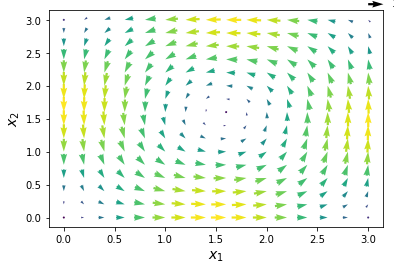

In [2]:
A=1
B=-1
k1=1
k2=1

x2 = np.arange(0, 3.2, 0.2)
x1 = np.arange(0, 3.2, 0.2)

Mx1, Mx2 = np.meshgrid(x1, x2)

u1=A*np.sin(k1*Mx1)*np.cos(k2*Mx2)
u2=B*np.cos(k1*Mx1)*np.sin(k2*Mx2)

fig3, ax3 = plt.subplots()
M = np.hypot(u1, u2)
Q = ax3.quiver(x1, x2, u1, u2, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = ax3.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax3.set_ylabel('$x_2$', fontsize=14)
ax3.set_xlabel('$x_1$', fontsize=14)

plt.savefig("2dflow.png")

### (c) Expand  the  flows $t_0$ to $t$ using  Taylor  series  to  obtain  the  values  of  the velocity field at $t$ and evaluating the new harmonic terms.

From the momentum equation we have that

\begin{equation}
    \frac{\partial u_i}{\partial t} = -u_j\frac{\partial u_i}{\partial u_j}.
\end{equation}

For the time $t$ , the velocity field can then be computed using the Taylor expansion

\begin{equation}
    u_i(t,x_i) = u_i(t_0,x_i) - (t-t_0)\left(u_j\frac{\partial u_i}{\partial x_j}\right)_{t_0} + ...
\end{equation}

Which can be separated in its respective components

\begin{equation}
    u_1(t,x_1,x_2) =  u_1(t_0,x_1,x_2) - (t-t_0)\left(u_1\frac{\partial u_1}{\partial x_1} + u_2\frac{\partial u_1}{\partial x_2}\right)_{t_0} + ...
\end{equation}

\begin{equation}
    u_2(t,x_1,x_2) =  u_2(t_0,x_1,x_2) - (t-t_0)\left(u_1\frac{\partial u_2}{\partial x_1} + u_2\frac{\partial u_2}{\partial x_2}\right)_{t_0} + ...
\end{equation}

The derivatives are understood as

\begin{equation}
    u_1\frac{\partial u_1}{\partial x_1} = -k_1A^2cos(k_1x_1)sin(k_1x_1)cos(k_2x_2)^2
\end{equation}

\begin{equation}
    u_2\frac{\partial u_1}{\partial x_2} = -k_2ABcos(k_2x_2)sin(k_2x_2)cos(k_1x_1)^2
\end{equation}

\begin{equation}
    u_1\frac{\partial u_2}{\partial x_1} = -k_1ABcos(k_1x_1)sin(k_1x_1)cos(k_2x_2)^2
\end{equation}

\begin{equation}
    u_2\frac{\partial u_2}{\partial x_2} = -k_2B^2cos(k_2x_2)sin(k_2x_2)cos(k_1x_1)^2
\end{equation}

Applying the results to the previous equation we arrive at

\begin{equation}
    u_1(t,x_1,x_2) = Acos(k_1x_1)cos(k_2x_2) + (t-t_0)\left(k_1A^2cos(k_1x_1)sin(k_1x_1)cos(k_2x_2)^2 + k_2ABcos(k_2x_2)sin(k_2x_2)cos(k_1x_1)^2\right)_{t_0} + ...
\end{equation}

\begin{equation}
\begin{split}
    u_2(t,x_1,x_2) = Bcos(k_1x_1)cos(k_2x_2) + (t-t_0)\left(k_1B^2cos(k_1x_1)sin(k_1x_1)cos(k_2x_2)^2 + k_2ABcos(k_2x_2)sin(k_2x_2)cos(k_1x_1)^2\right)_{t_0} + ...
\end{split}
\end{equation}

# Second exercise

The Energy and Environment Laboratory of the University of Brasilia is conducting an eddy-covariance  study  on  the  Atmospheric  Boundary  Layer  of  the  Brazilian  Cerrado biome  In  this  study,  10  Hz  data  has  be  obtained  for  turbulent  variables -3D  wind speed components (using sonic anemometer) and H2O and CO2 concentrations. The measurement   towers   were   installed   over   the   original   vegetation and   over   a Eucalyptus plantation. The one hour data is available for this homework

### (a) Plot   the   time   series   for   the   velocity   components   and   the   CO2 concentration instantaneous fields;

In [3]:
df_cerrado_raw = pd.read_excel("Data Eddy Covariance Cerrado.xlsx", header = 1)
df_eucalyptus_raw = pd.read_excel("Data Eddy Covariance Eucalyptus.xlsx", header = 1)

In [4]:
df_cerrado = df_cerrado_raw.drop([0,1]).reset_index(drop=True)[0:36000]
df_eucalyptus = df_eucalyptus_raw.drop([0,1]).reset_index(drop=True)[0:36000]

In [5]:
units = {}
for variable in df_cerrado:
    units[variable] = df_cerrado[variable][0]

In [6]:
df_cerrado["Time"] = np.arange(0, len(df_cerrado)/10, 0.1).round(2).tolist()
df_eucalyptus["Time"] = np.arange(0, len(df_eucalyptus)/10, 0.1).round(2).tolist()

In [8]:
for df in [df_cerrado, df_eucalyptus]:
    df["U"] = ((df["Ux"]**2)+(df["Uy"]**2)+(df["Uz"]**2))**(1/2)
    df["U_x'"] = df["Ux"] - df["Ux"].mean()
    df["U_y'"] = df["Uy"] - df["Uy"].mean()
    df["U_z'"] = df["Uz"] - df["Uz"].mean()
    df["U'"] = ((df["U_x'"]**2)+(df["U_y'"]**2)+(df["U_z'"]**2))**(1/2)
    df["KE"] = (((df["U_x'"]**2).mean())+((df["U_y'"]**2).mean())+((df["U_z'"]**2).mean()))**(1/2)

In [10]:
figs = {}
for key_name, df in zip(["Cerrado", "Eucalyptus"], [df_cerrado, df_eucalyptus]):
    for variable in ["U","U'","CO2"]:
        figs["{}_{}".format(key_name,variable)] = px.line(df, x="Time", y=variable, title=key_name, template="simple_white")

In [11]:
for fig in figs:
    figs[fig].write_html(fig+".html")

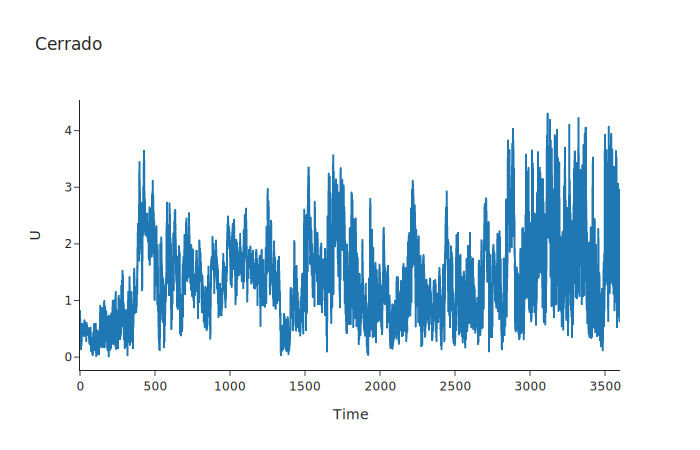

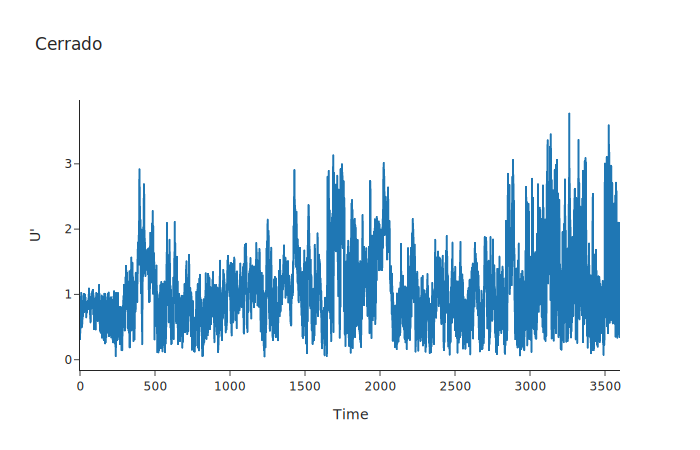

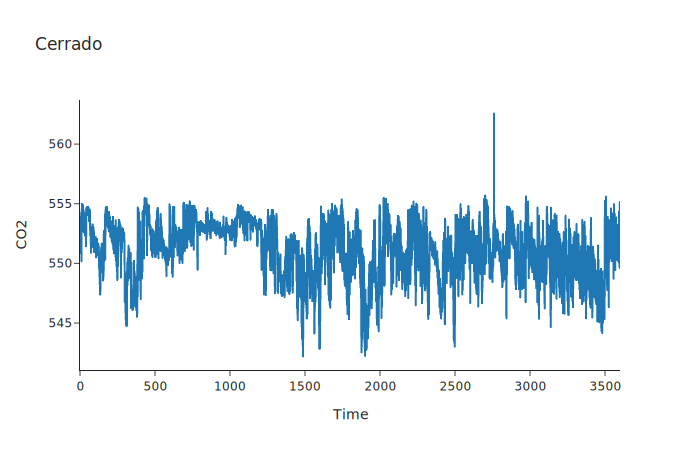

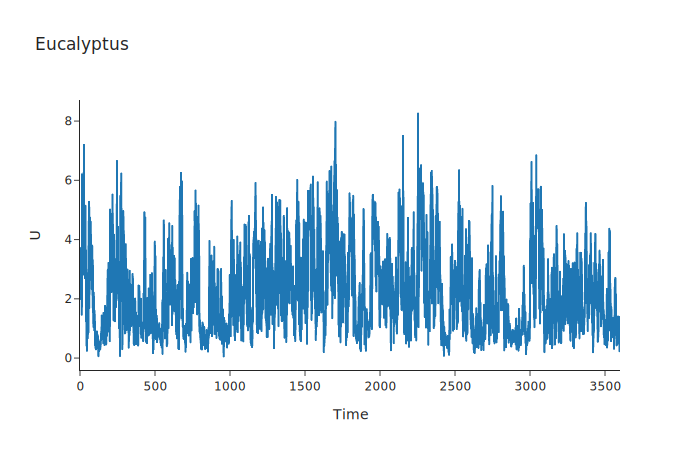

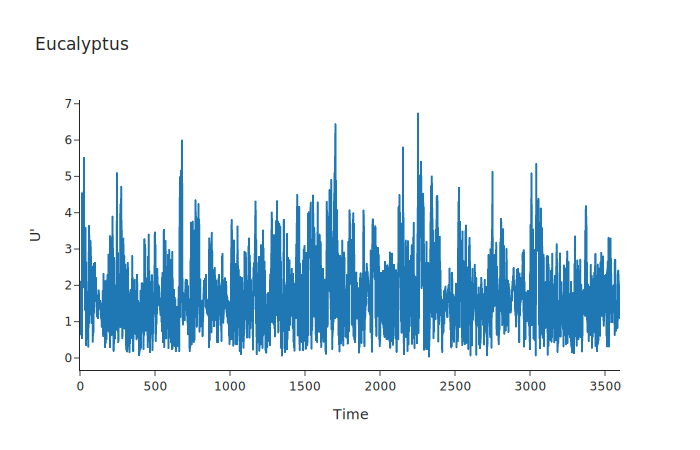

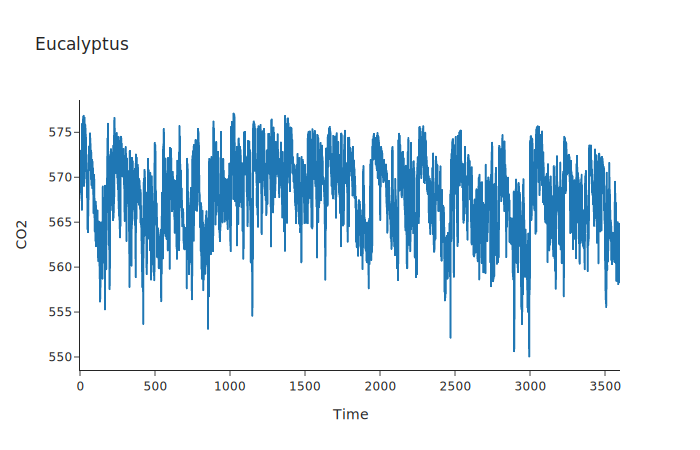

In [12]:
for fig in figs:
    figs[fig].show()

### (b) Compute the  one-hour  mean  values,  variances  and  the  kinetic  energy  of turbulence;

In [13]:
for df_name, df in zip(["Cerrado", "Eucalyptus"], [df_cerrado, df_eucalyptus]):
    print("Mean U for {}: {}".format(df_name, df["U"].mean().round(4)))
    print("Variance U for {}: {}".format(df_name, df["U"].var().round(4)))
    print("Kinetic energy for {}: {}".format(df_name, df["KE"][0].round(4)))
    print(" ")

Mean U for Cerrado: 1.3947
Variance U for Cerrado: 0.5316
Kinetic energy for Cerrado: 1.1851
 
Mean U for Eucalyptus: 2.1919
Variance U for Eucalyptus: 1.7462
Kinetic energy for Eucalyptus: 1.9032
 


### (c) Compute the turbulence flux for the CO2 given by the mean of $–u'_3\phi'$;

In [16]:
for df in [df_cerrado, df_eucalyptus]:
    df["CO2'"] = df["CO2"] - df["CO2"].mean()
    df["FluxCO2"] = -(df["U_z'"]*df["CO2'"]).mean()

In [17]:
for df_name, df in zip(["Cerrado", "Eucalyptus"], [df_cerrado, df_eucalyptus]):
    print("Turbulence flux of CO2 for {}: {}".format(df_name, df["FluxCO2"][0].round(4)))
    print(" ")

Turbulence flux of CO2 for Cerrado: 0.3446
 
Turbulence flux of CO2 for Eucalyptus: 1.3582
 


### (d) Compute the power spectrum for the $u_{3}$ component.

In [18]:
figs = {}

for df_name, df in zip(["Cerrado", "Eucalyptus"], [df_cerrado, df_eucalyptus]):
    acquisition = 10
    u_fft = np.fft.fft(df["Uz"])/len(df["Uz"])

    frequency = (acquisition/2)*np.arange(0,1,1/(len(u_fft)/2))

    spectrum = (abs(u_fft[0:int(len(u_fft)/2)])**2)/len(df["Uz"])
    spectrum[0] = 0
    
    df_temp = pd.DataFrame()
    df_temp["Frequency"] = frequency
    df_temp["Spectrum"] = spectrum
    
    
    figs["{}".format(df_name)] = px.line(df_temp, x="Frequency", y="Spectrum", log_x=True, log_y=True, title=df_name, template="simple_white")

    figs["{}".format(df_name)].update_layout(
        yaxis = dict(
            showexponent = 'all',
            exponentformat = 'e'
        )
    )

In [19]:
for fig in figs:
    figs[fig].write_html(fig+".html")

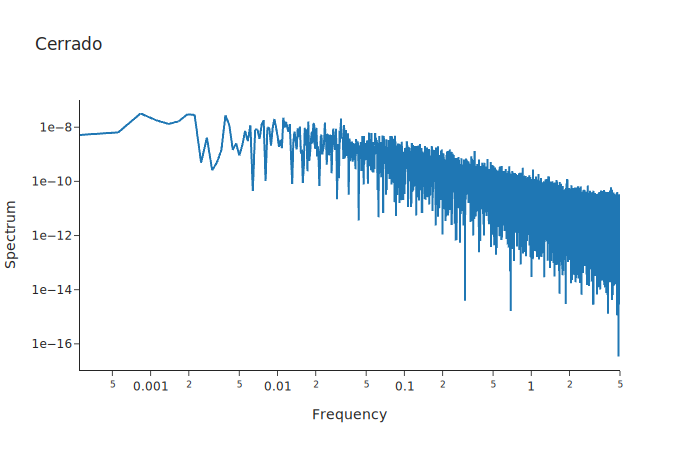

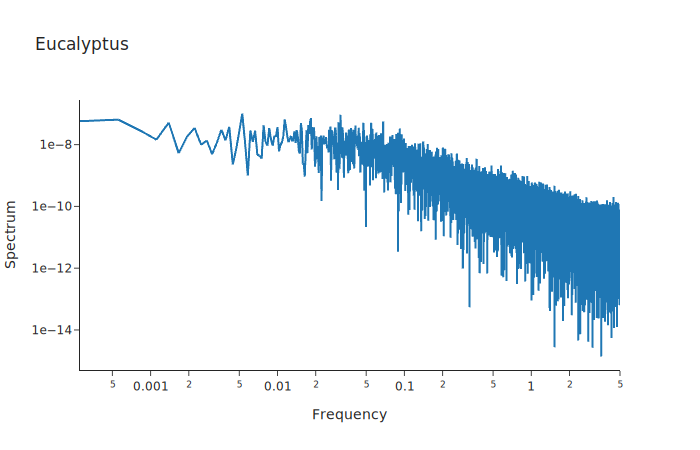

In [20]:
for fig in figs:
    figs[fig].show()